In [31]:
import pandas as pd

df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print('Dataset shape:', df.shape)
print('\nColumns:\n', df.columns.tolist())

df.head()


Dataset shape: (7043, 21)

Columns:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [34]:
df = df.drop(['customerID'], axis=1) #customerID is redundant
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
X = df.drop('Churn', axis=1)
y = (df['Churn'] == 'Yes').astype(int) 

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

In [38]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'--- {col} ---')
        print(df[col].unique())
        print()

--- gender ---
['Female' 'Male']

--- Partner ---
['Yes' 'No']

--- Dependents ---
['No' 'Yes']

--- PhoneService ---
['No' 'Yes']

--- MultipleLines ---
['No phone service' 'No' 'Yes']

--- InternetService ---
['DSL' 'Fiber optic' 'No']

--- OnlineSecurity ---
['No' 'Yes' 'No internet service']

--- OnlineBackup ---
['Yes' 'No' 'No internet service']

--- DeviceProtection ---
['No' 'Yes' 'No internet service']

--- TechSupport ---
['No' 'Yes' 'No internet service']

--- StreamingTV ---
['No' 'Yes' 'No internet service']

--- StreamingMovies ---
['No' 'Yes' 'No internet service']

--- Contract ---
['Month-to-month' 'One year' 'Two year']

--- PaperlessBilling ---
['Yes' 'No']

--- PaymentMethod ---
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

--- Churn ---
['No' 'Yes']



In [48]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='mean')
X_train[['TotalCharges']] = si.fit_transform(X_train[['TotalCharges']])
X_val[['TotalCharges']]   = si.transform(X_val[['TotalCharges']])
X_test[['TotalCharges']]  = si.transform(X_test[['TotalCharges']])

In [49]:
cat_cols = X_train.select_dtypes(include='object').columns
num_cols = ['tenure','MonthlyCharges','TotalCharges']
no_scale_cols = ['SeniorCitizen']

In [50]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
X_train_cat = ohe.fit_transform(X_train[cat_cols])
X_val_cat = ohe.transform(X_val[cat_cols])
X_test_cat = ohe.transform(X_test[cat_cols])

cat_feature_names = ohe.get_feature_names_out(cat_cols)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train[num_cols])
X_val_scaled = ss.transform(X_val[num_cols])
X_test_scaled = ss.transform(X_test[num_cols])

In [51]:
X_train_final = pd.concat([X_train[no_scale_cols], 
                           pd.DataFrame(X_train_scaled, columns=num_cols, index=X_train.index),
                           pd.DataFrame(X_train_cat, columns=cat_feature_names, index=X_train.index)],
                           axis=1)

X_val_final = pd.concat([X_val[no_scale_cols],
                        pd.DataFrame(X_val_scaled, columns=num_cols, index=X_val.index),
                        pd.DataFrame(X_val_cat, columns=cat_feature_names, index=X_val.index)],
                       axis=1)

X_test_final = pd.concat([X_test[no_scale_cols],
                         pd.DataFrame(X_test_scaled, columns=num_cols, index=X_test.index),
                         pd.DataFrame(X_test_cat, columns=cat_feature_names, index=X_test.index)],
                        axis=1)


print('Train shape: ', X_train_final.shape)
print('Val shape: ', X_val_final.shape)
print('Test shape: ', X_test_final.shape)


Train shape:  (4930, 30)
Val shape:  (1056, 30)
Test shape:  (1057, 30)


In [61]:
print(df.info())       
print(df.describe())     
print(df['Churn'].value_counts(normalize=True))  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


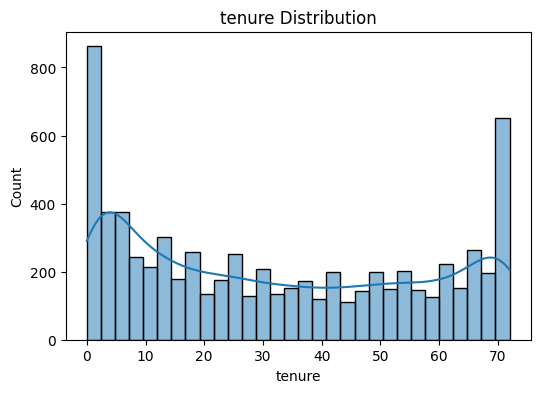

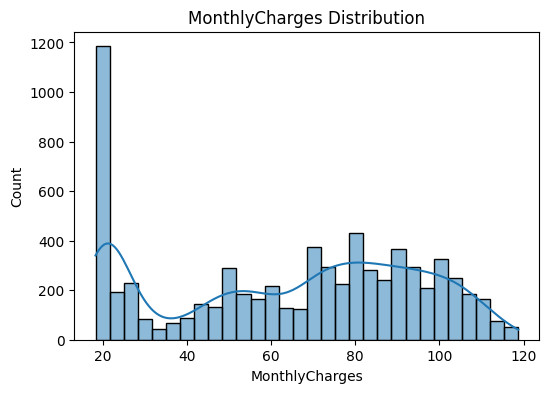

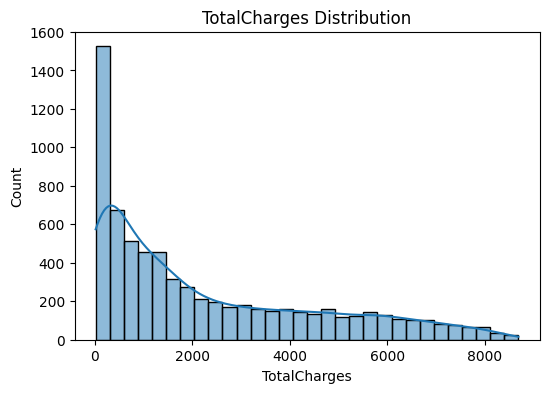

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['tenure','MonthlyCharges','TotalCharges']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')
    plt.show()

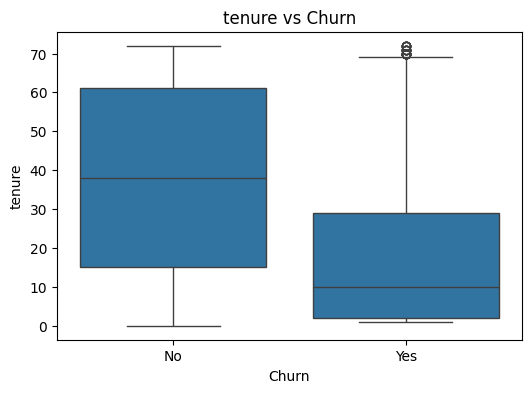

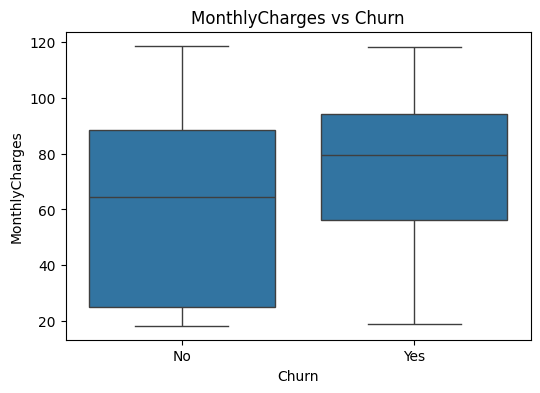

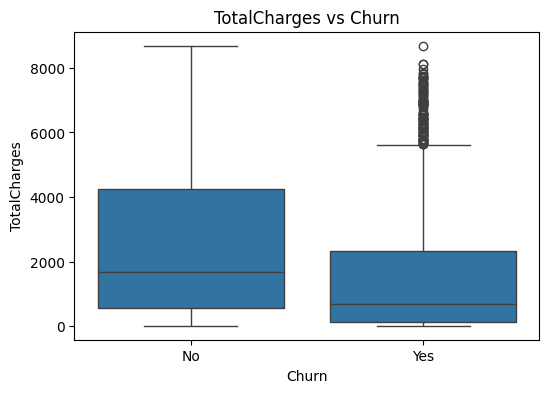

In [63]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
    plt.show()


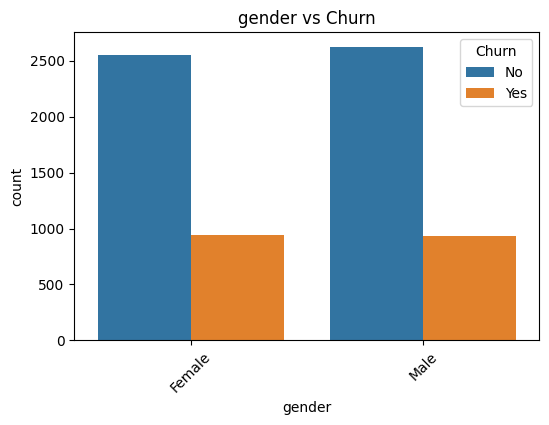

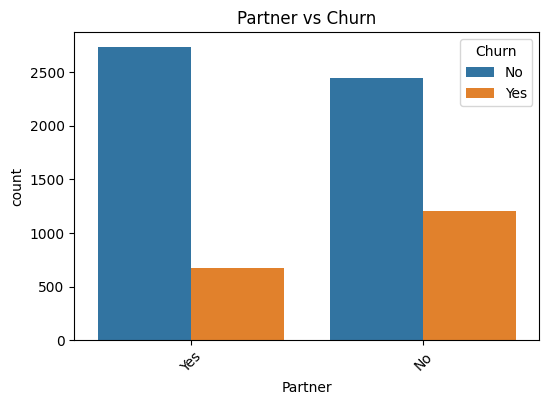

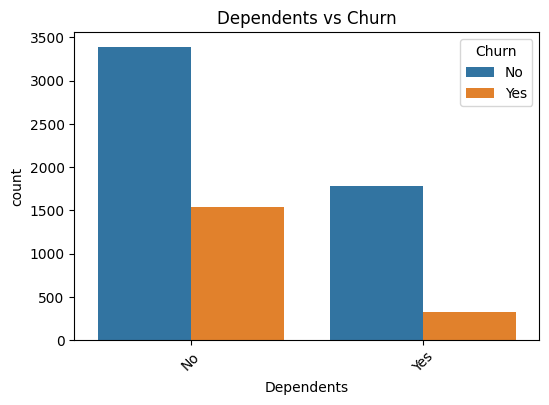

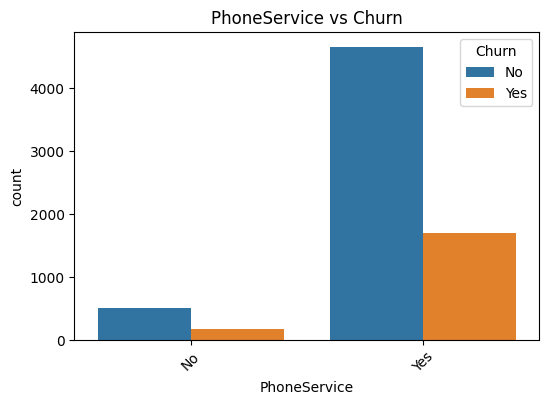

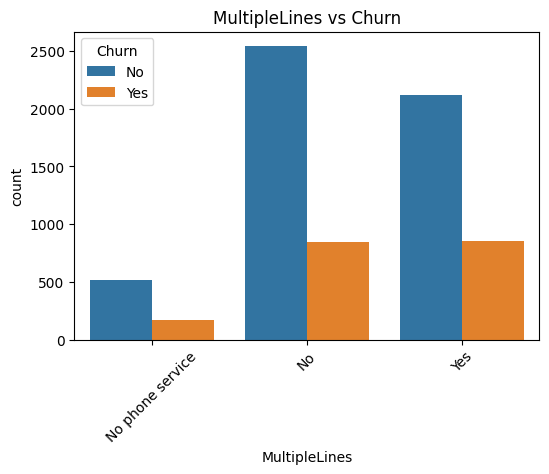

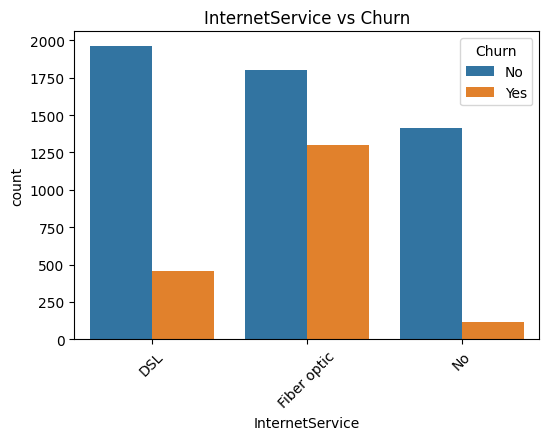

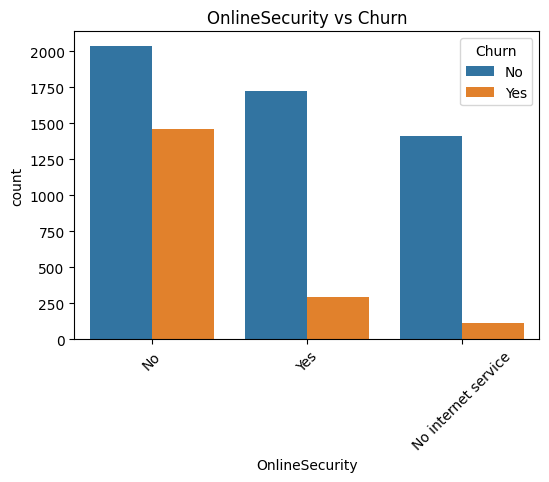

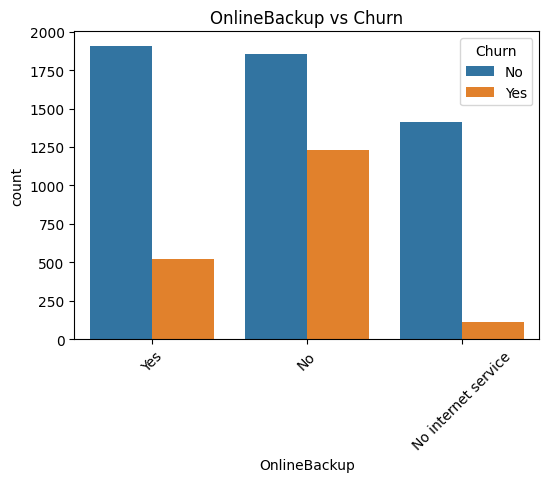

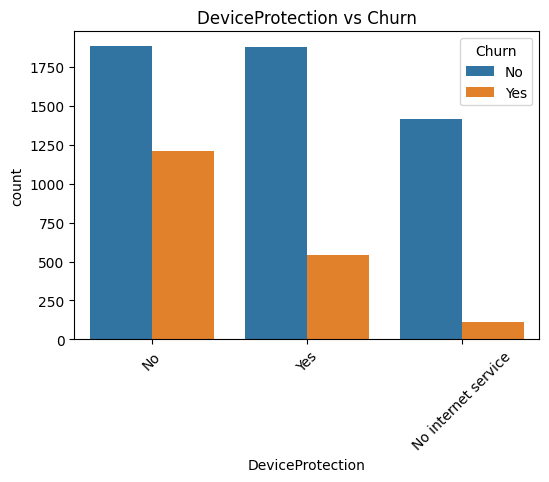

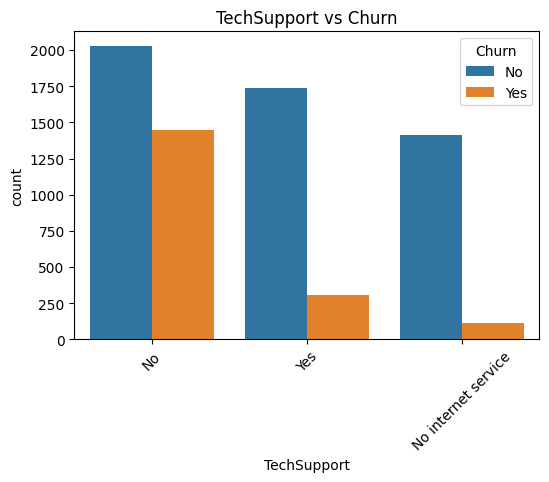

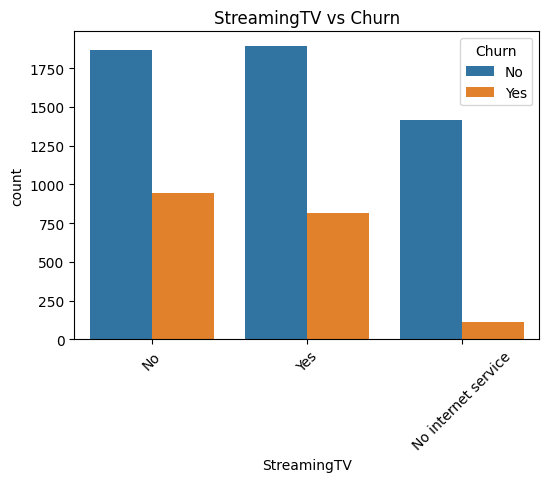

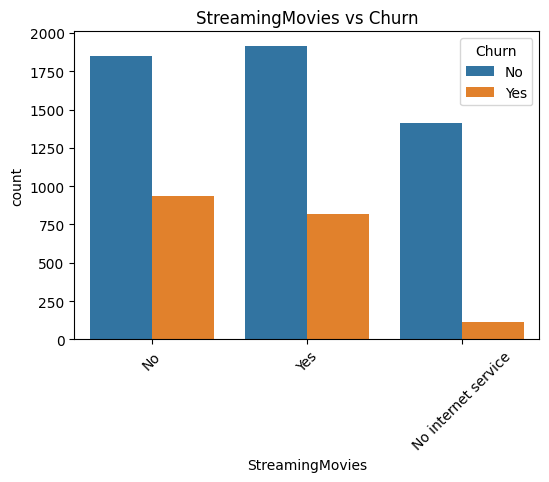

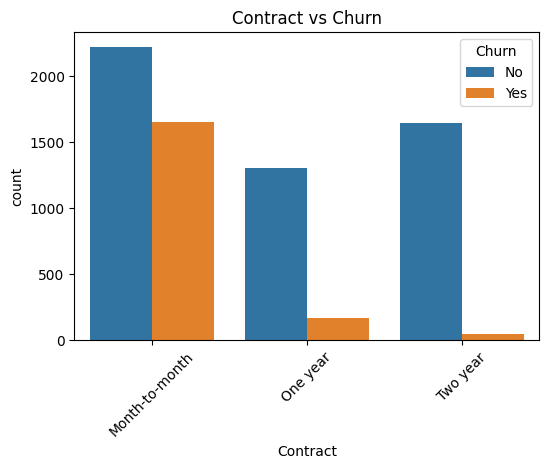

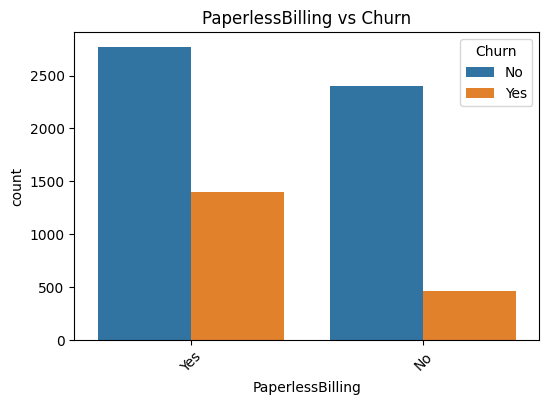

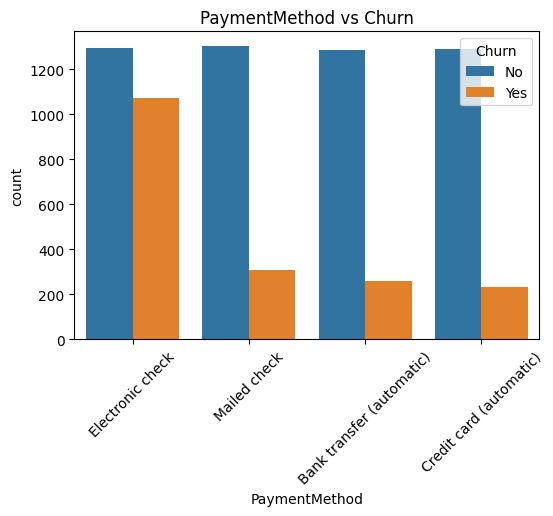

In [64]:
cat_cols = df.select_dtypes(include='object').columns.drop('Churn')

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.show()


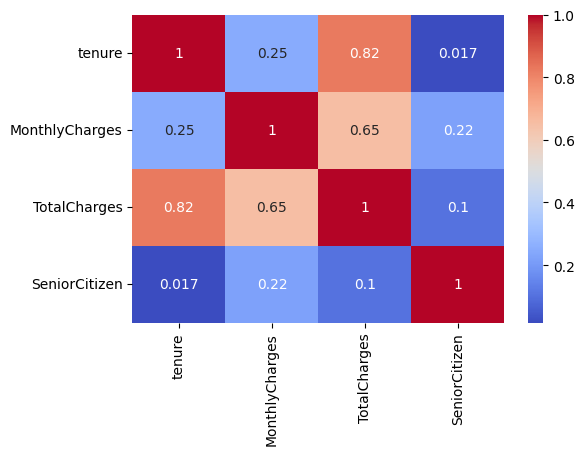

In [65]:
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols + ['SeniorCitizen']].corr(), annot=True, cmap='coolwarm')
plt.show()
